# 1. Data Loading

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, r2_score, confusion_matrix

In [2]:
# Loading The Data
df1 = pd.read_csv("../Datasets/student-por.csv",sep=";")
df2 = pd.read_csv("../Datasets/student-mat.csv",sep=";")
df = pd.concat([df1, df2], ignore_index=True)

df = df[['school', 'sex', 'age', 'address', 'famsize','Pstatus', 'Medu', 'Fedu', 'studytime', 'failures','absences', 'G1', 'G2', 'G3']]

In [3]:
# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (1044, 14)

First 5 rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,2,0,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,2,0,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,2,0,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,3,0,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,2,0,0,11,13,13


In [4]:
# Dataset information
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     1044 non-null   object
 1   sex        1044 non-null   object
 2   age        1044 non-null   int64 
 3   address    1044 non-null   object
 4   famsize    1044 non-null   object
 5   Pstatus    1044 non-null   object
 6   Medu       1044 non-null   int64 
 7   Fedu       1044 non-null   int64 
 8   studytime  1044 non-null   int64 
 9   failures   1044 non-null   int64 
 10  absences   1044 non-null   int64 
 11  G1         1044 non-null   int64 
 12  G2         1044 non-null   int64 
 13  G3         1044 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 114.3+ KB


In [5]:
# Basic statistics
print("\nDescriptive statistics:")
display(df.describe(include='all'))


Descriptive statistics:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,absences,G1,G2,G3
count,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
unique,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,772,591,NaN,759,738,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,1.970307,0.264368,4.434866,11.213602,11.246169,11.341954
std,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,0.834353,0.656142,6.210017,2.983394,3.285071,3.864796
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,1.000000,0.000000,0.000000,9.000000,9.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,2.000000,0.000000,2.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,2.000000,0.000000,6.000000,13.000000,13.000000,14.000000


# 2. Data Pre-Processing

In [6]:
# Checking Duplicate Records
df.duplicated().sum()

1

In [7]:
# Dropping duplicate records
df.drop_duplicates(inplace=True)

In [8]:
# Droping NA Rows
df.dropna(inplace=True)

In [9]:
# Category Columns and Numeric Columns
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# numerical_cols.remove('G3')  # Exclude target

print("Numerical columns:", numerical_cols)
print("\nCategorical columns:", categorical_cols)

# For categorical columns, let's see unique values
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Numerical columns: ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus']

Unique values in categorical columns:
school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']


In [10]:
# For binary categorical variables, Label Encoding is sufficient
binary_categorical = [col for col in categorical_cols if len(df[col].unique()) == 2]

# For multi-class categorical variables, we'll use One-Hot Encoding
multi_categorical = [col for col in categorical_cols if len(df[col].unique()) > 2]

print("Binary categorical:", binary_categorical)
print("Multi-categorical:", multi_categorical)

# Label Encoding for binary categorical
label_encoder = LabelEncoder()
for col in binary_categorical:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for multi-categorical
df = pd.get_dummies(df, columns=multi_categorical, drop_first=True)

# Verify the transformations
print("\nAfter encoding:")
display(df.head())

Binary categorical: ['school', 'sex', 'address', 'famsize', 'Pstatus']
Multi-categorical: []

After encoding:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,2,0,4,0,11,11
1,0,0,17,1,0,1,1,1,2,0,2,9,11,11
2,0,0,15,1,1,1,1,1,2,0,6,12,13,12
3,0,0,15,1,0,1,4,2,3,0,0,14,14,14
4,0,0,16,1,0,1,3,3,2,0,0,11,13,13


In [11]:
# We'll normalize all numerical features except the target (G3)
features_to_normalize = [col for col in numerical_cols if col != 'G3']

scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Verify normalization
print("\nAfter normalization:")
display(df[features_to_normalize].describe())


After normalization:


,age,Medu,Fedu,studytime,failures,absences,G1,G2
count,1.043000e+03,1.043000e+03,1.043000e+03,1.043000e+03,1043.000000,1.043000e+03,1.043000e+03,1.043000e+03
mean,-1.008249e-15,2.009685e-16,1.703123e-17,-1.362498e-17,0.000000,-6.131241e-17,1.226248e-16,-8.174988e-17
std,1.000480e+00,1.000480e+00,1.000480e+00,1.000480e+00,1.000480,1.000480e+00,1.000480e+00,1.000480e+00
min,-1.391828e+00,-2.315203e+00,-2.171436e+00,-1.162911e+00,-0.403330,-7.139273e-01,-3.758545e+00,-3.423284e+00
25%,-5.853410e-01,-5.370315e-01,-1.262240e+00,-1.162911e+00,-0.403330,-7.139273e-01,-7.417463e-01,-6.835476e-01
50%,2.211460e-01,3.520540e-01,-3.530436e-01,3.562277e-02,-0.403330,-3.918572e-01,-7.134648e-02,-7.471742e-02
75%,1.027633e+00,1.241140e+00,5.561527e-01,3.562277e-02,-0.403330,2.522831e-01,5.990533e-01,5.341128e-01
max,4.253581e+00,1.241140e+00,1.465349e+00,2.432691e+00,4.169208,1.136370e+01,2.610253e+00,2.360603e+00


# 3. Exploratory Data Analysis (EDA)

In [12]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,absences,G1,G2,G3
count,1043.000000,1043.000000,1.043000e+03,1043.000000,1043.000000,1043.000000,1.043000e+03,1.043000e+03,1.043000e+03,1043.000000,1.043000e+03,1.043000e+03,1.043000e+03,1043.000000
mean,0.260786,0.434324,-1.008249e-15,0.726750,0.292426,0.883988,2.009685e-16,1.703123e-17,-1.362498e-17,0.000000,-6.131241e-17,1.226248e-16,-8.174988e-17,11.341323
std,0.439274,0.495906,1.000480e+00,0.445842,0.455095,0.320392,1.000480e+00,1.000480e+00,1.000480e+00,1.000480,1.000480e+00,1.000480e+00,1.000480e+00,3.866596
min,0.000000,0.000000,-1.391828e+00,0.000000,0.000000,0.000000,-2.315203e+00,-2.171436e+00,-1.162911e+00,-0.403330,-7.139273e-01,-3.758545e+00,-3.423284e+00,0.000000
25%,0.000000,0.000000,-5.853410e-01,0.000000,0.000000,1.000000,-5.370315e-01,-1.262240e+00,-1.162911e+00,-0.403330,-7.139273e-01,-7.417463e-01,-6.835476e-01,10.000000
50%,0.000000,0.000000,2.211460e-01,1.000000,0.000000,1.000000,3.520540e-01,-3.530436e-01,3.562277e-02,-0.403330,-3.918572e-01,-7.134648e-02,-7.471742e-02,11.000000
75%,1.000000,1.000000,1.027633e+00,1.000000,1.000000,1.000000,1.241140e+00,5.561527e-01,3.562277e-02,-0.403330,2.522831e-01,5.990533e-01,5.341128e-01,14.000000
max,1.000000,1.000000,4.253581e+00,1.000000,1.000000,1.000000,1.241140e+00,1.465349e+00,2.432691e+00,4.169208,1.136370e+01,2.610253e+00,2.360603e+00,20.000000


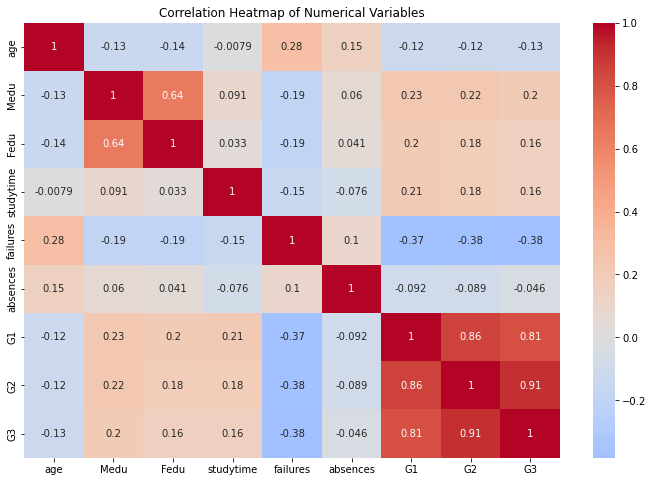

In [13]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

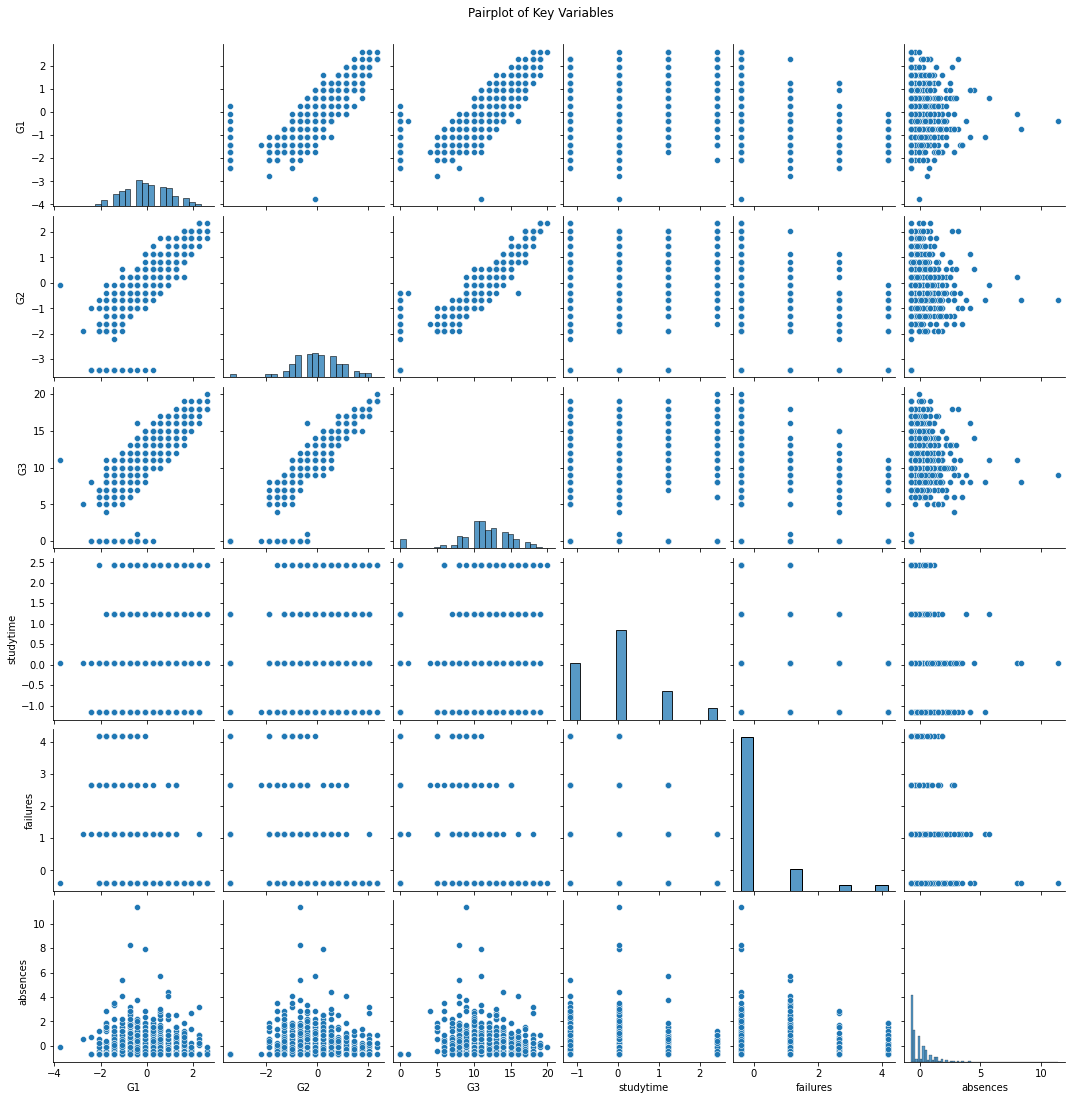

In [14]:
# Pairplot for key variables
key_vars = ['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']
sns.pairplot(df[key_vars])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

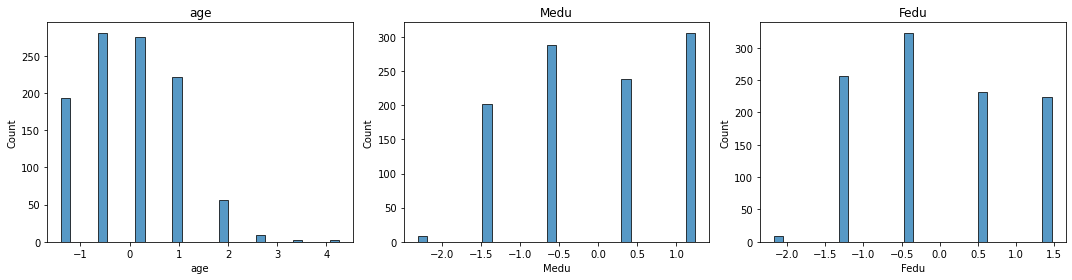

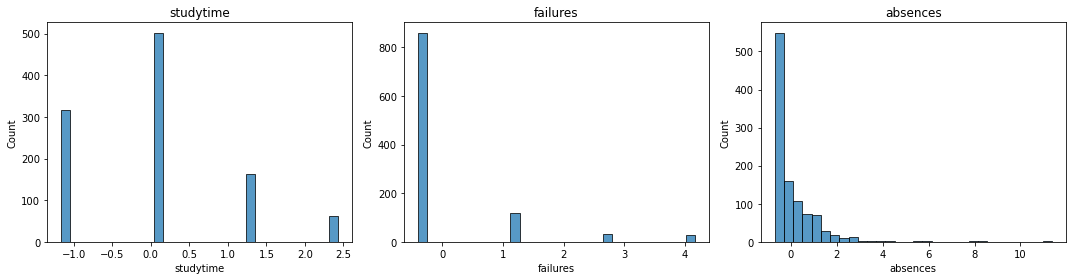

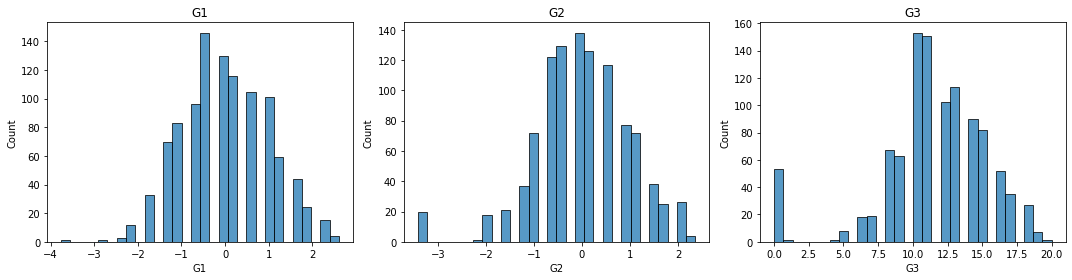

In [15]:
plots_per_row = 3

for i in range(0, len(numerical_cols), plots_per_row):
    subset = numerical_cols[i:i + plots_per_row]
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))

    if len(subset) == 1:
        axes = [axes]

    for ax, column in zip(axes, subset):
        sns.histplot(data=df, x=column, bins=30, ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

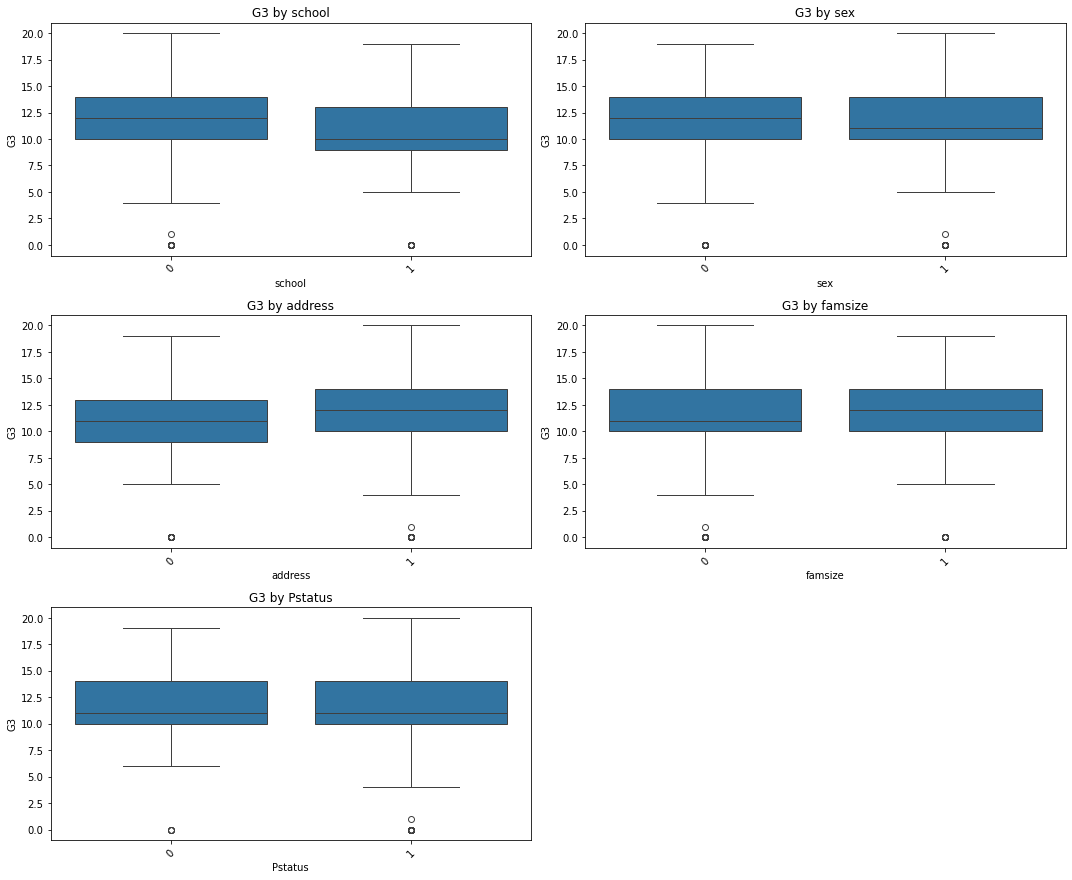

In [16]:
# Boxplots for categorical variables vs G3
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):  # Plot first 10 for brevity
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=col, y='G3', data=df)
    plt.title(f'G3 by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

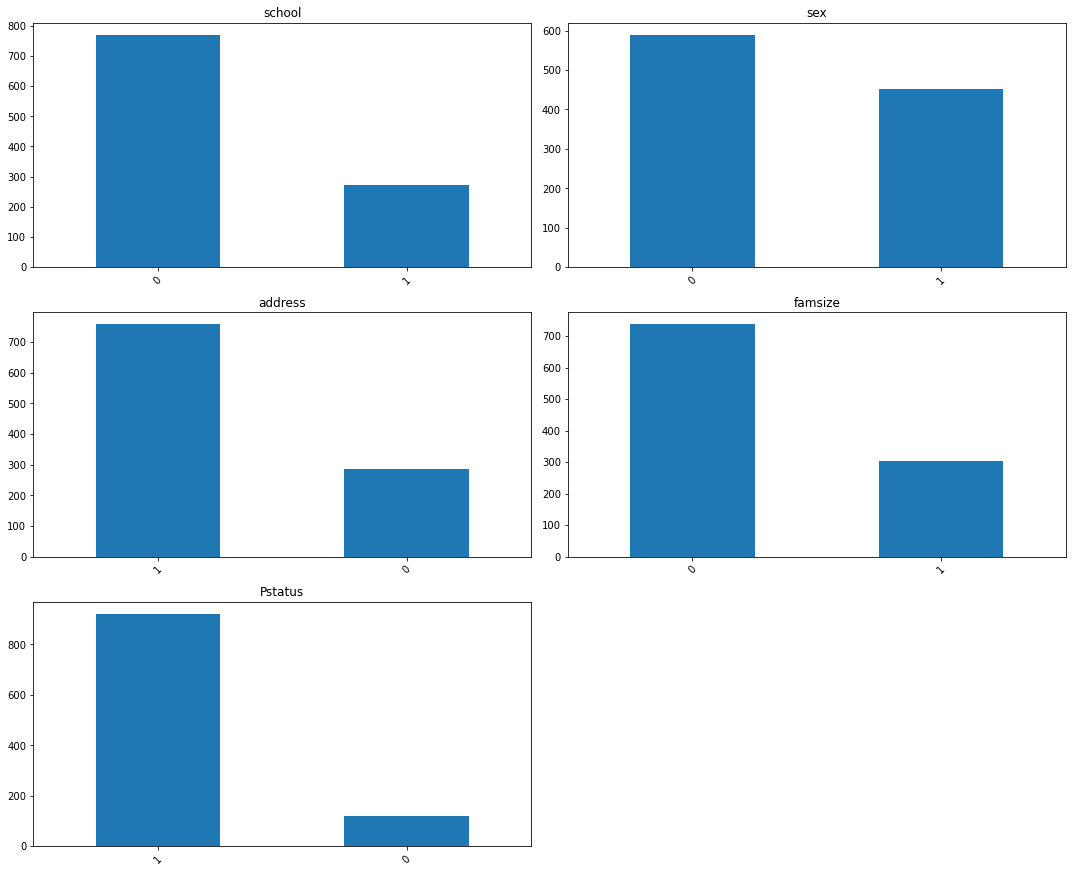

In [17]:
# Check class imbalance in categorical features
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

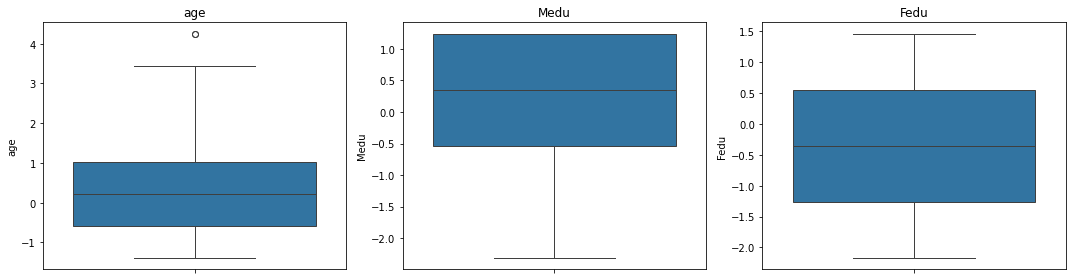

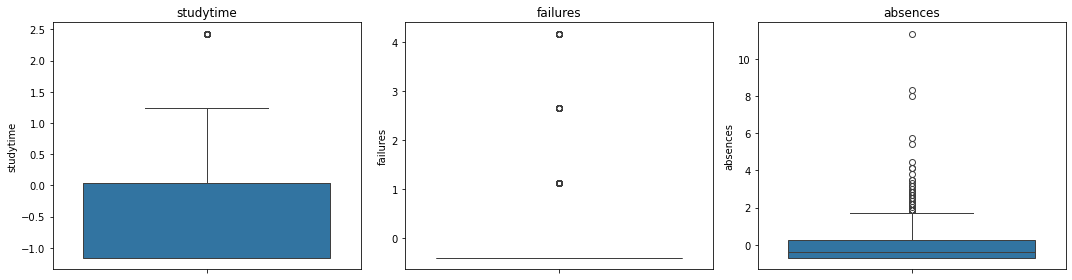

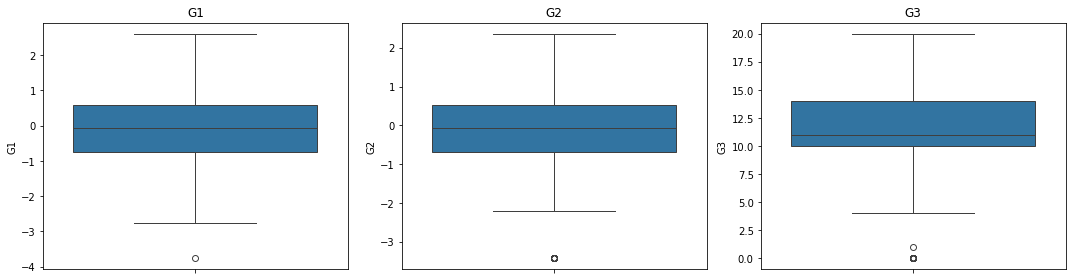

In [18]:
plots_per_row = 3

for i in range(0, len(numerical_cols), plots_per_row):
    subset = numerical_cols[i:i + plots_per_row]
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
    
    if len(subset) == 1:
        axes = [axes]

    for ax, column in zip(axes, subset):
        sns.boxplot(data=df[column], ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

In [19]:
# Checking Outliers
outlier_columns = numerical_cols[:]
outlier_columns.remove("G3")

for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"Outliers for {column} : {len(outliers)} / {len(df)} ({len(outliers)/len(df):.1%})")

Outliers for age : 2 / 1043 (0.2%)
Outliers for Medu : 0 / 1043 (0.0%)
Outliers for Fedu : 0 / 1043 (0.0%)
Outliers for studytime : 62 / 1043 (5.9%)
Outliers for failures : 183 / 1043 (17.5%)
Outliers for absences : 54 / 1043 (5.2%)
Outliers for G1 : 1 / 1043 (0.1%)
Outliers for G2 : 20 / 1043 (1.9%)


In [20]:
# Winsorization (Handling Outliers)
winsorize_columns = numerical_cols[:]
winsorize_columns.remove("G3")

def winsorize_iqr(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return series.clip(lower, upper)

df[winsorize_columns] = df[winsorize_columns].apply(winsorize_iqr)
df[winsorize_columns].head(10)

,age,Medu,Fedu,studytime,failures,absences,G1,G2
0,1.027633,1.241140,1.465349,0.035623,-0.40333,-0.069787,-2.752946,-0.074717
1,0.221146,-1.426117,-1.262240,0.035623,-0.40333,-0.391857,-0.741746,-0.074717
2,-1.391828,-1.426117,-1.262240,0.035623,-0.40333,0.252283,0.263853,0.534113
3,-1.391828,1.241140,-0.353044,1.234157,-0.40333,-0.713927,0.934253,0.838528
4,-0.585341,0.352054,0.556153,0.035623,-0.40333,-0.713927,-0.071346,0.534113
5,-0.585341,1.241140,0.556153,0.035623,-0.40333,0.252283,0.263853,0.229698
6,-0.585341,-0.537032,-0.353044,0.035623,-0.40333,-0.713927,0.599053,0.229698
7,0.221146,1.241140,1.465349,0.035623,-0.40333,-0.391857,-0.406546,0.534113
8,-1.391828,0.352054,-0.353044,0.035623,-0.40333,-0.713927,1.269453,1.447358
9,-1.391828,0.352054,1.465349,0.035623,-0.40333,-0.713927,0.263853,0.229698


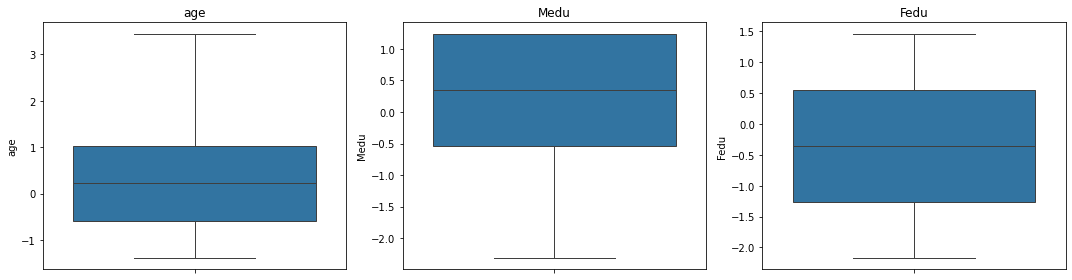

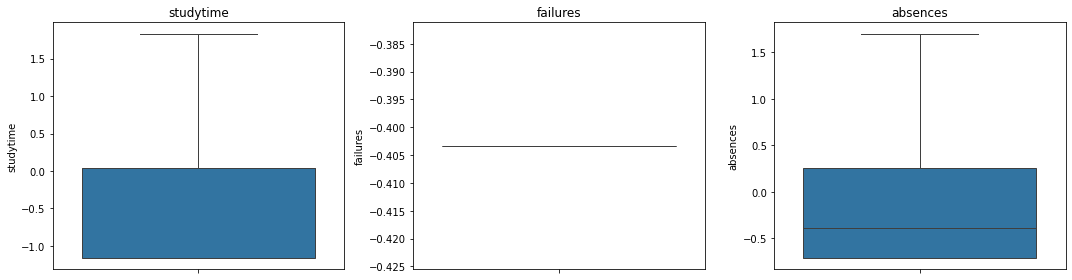

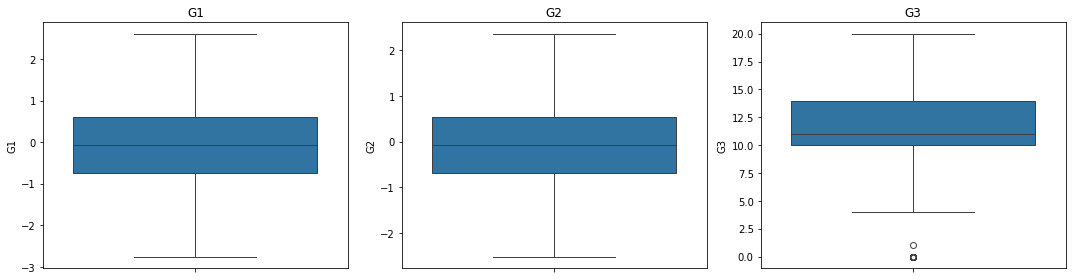

In [21]:
# Checking data after Winsorization
plots_per_row = 3

# Loop through columns in chunks of 3
for i in range(0, len(numerical_cols), plots_per_row):
    subset = numerical_cols[i:i + plots_per_row]
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
    
    # If only one plot in this row, axes is not iterable, so make it a list
    if len(subset) == 1:
        axes = [axes]

    for ax, column in zip(axes, subset):
        sns.boxplot(data=df[column], ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

# 5. Data Selection for Modeling

In [22]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,absences,G1,G2,G3
0,0,0,1.027633,1,0,0,1.241140,1.465349,0.035623,-0.40333,-0.069787,-2.752946,-0.074717,11
1,0,0,0.221146,1,0,1,-1.426117,-1.262240,0.035623,-0.40333,-0.391857,-0.741746,-0.074717,11
2,0,0,-1.391828,1,1,1,-1.426117,-1.262240,0.035623,-0.40333,0.252283,0.263853,0.534113,12
3,0,0,-1.391828,1,0,1,1.241140,-0.353044,1.234157,-0.40333,-0.713927,0.934253,0.838528,14
4,0,0,-0.585341,1,0,1,0.352054,0.556153,0.035623,-0.40333,-0.713927,-0.071346,0.534113,13


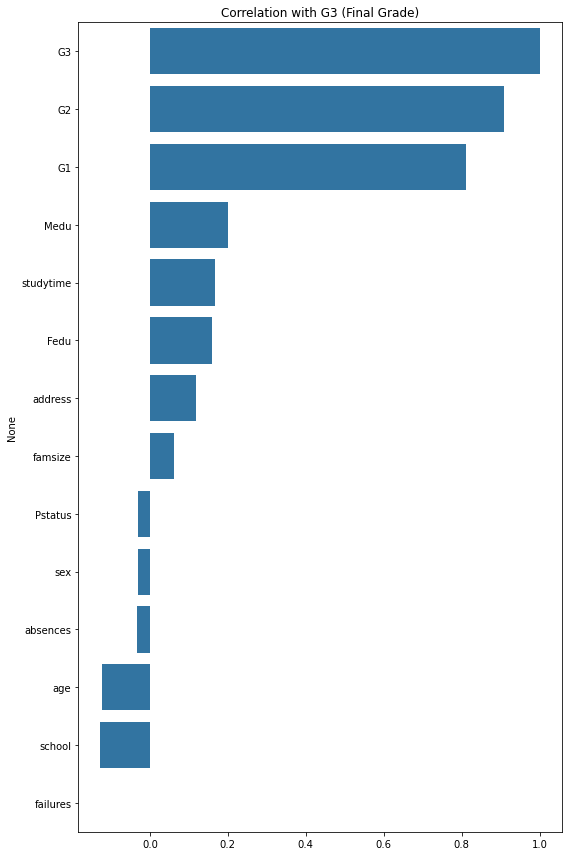

Selected features based on correlation:
['G2', 'G1', 'Medu', 'studytime', 'Fedu', 'address', 'age', 'school']


In [23]:
# Calculate correlations with G3
corr_with_target = df.corr()['G3'].sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(y=corr_with_target.index, x=corr_with_target.values)
plt.title('Correlation with G3 (Final Grade)')
plt.tight_layout()
plt.show()

# Let's select features with correlation > 0.1 or < -0.1 (absolute value)
selected_features = corr_with_target[abs(corr_with_target) > 0.1].index.tolist()
selected_features.remove('G3')  # Remove target variable

print("Selected features based on correlation:")
print(selected_features)

In [24]:
# Feature and Target Selection
feature_data = df[selected_features]
target_data = df["G3"]

feature_train, feature_test, target_train, target_test = train_test_split(feature_data,target_data,test_size=0.2,random_state=42)

# 6. Model Loading & Training

In [25]:
# Linear Regression Model
model = LinearRegression()
model.fit(feature_train, target_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 7. Model Predicting

In [26]:
# Prediction of Test Data
prediction_data = model.predict(feature_test)

# Calculate metrics
mae = mean_absolute_error(target_test, prediction_data)
mse = mean_squared_error(target_test, prediction_data)
rmse = np.sqrt(mse)  # or use mean_squared_error(..., squared=False)
r2 = r2_score(target_test, prediction_data)
# accuracy = accuracy_score(target_test, pd.Series(prediction_data))

# print(f"Accuracy Score: {accuracy:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 1.11
MSE: 3.11
RMSE: 1.76
R² Score: 0.8107


# 8. Verification & Reporting

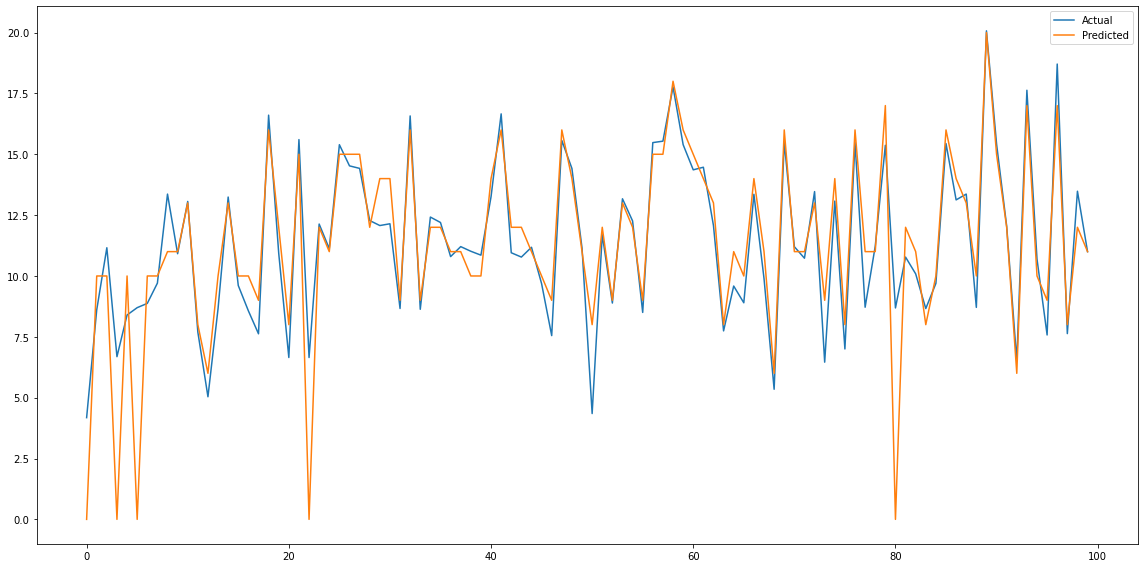

In [27]:
test = pd.DataFrame({'Predicted':prediction_data,'Actual':target_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
plt.tight_layout()
plt.show()

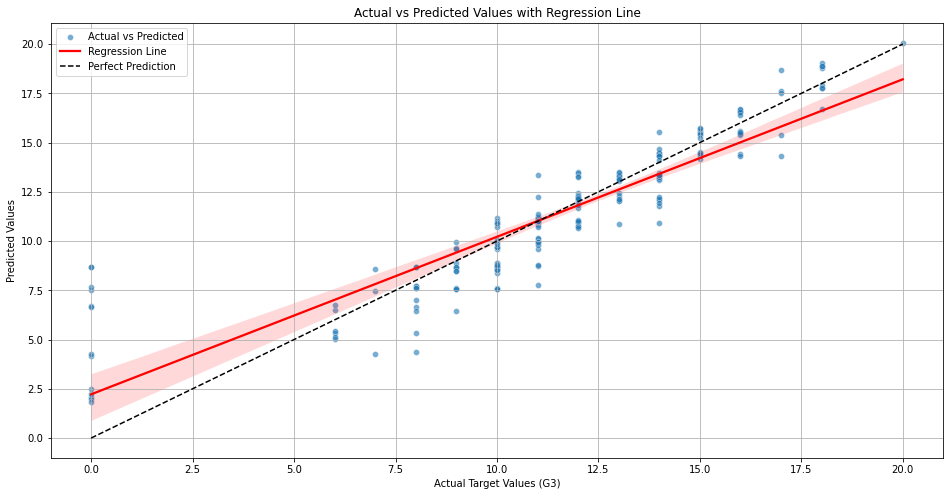

In [28]:

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(16, 8))
sns.scatterplot(x=target_test, y=prediction_data, alpha=0.6, label='Actual vs Predicted')

# Plot the regression line
sns.regplot(x=target_test, y=prediction_data, scatter=False, color='red', label='Regression Line')

# Plot the ideal line (perfect predictions)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Target Values (G3)')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Line')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

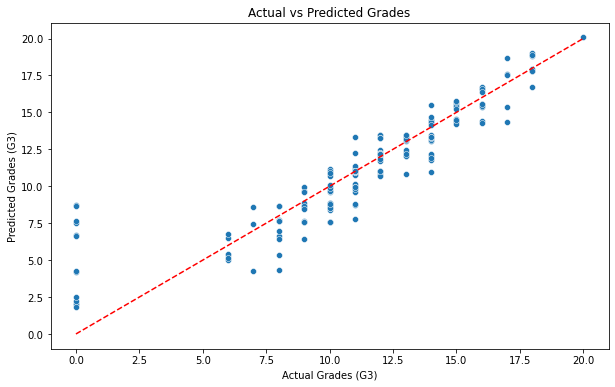

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=target_test, y=prediction_data)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'r--')
plt.xlabel('Actual Grades (G3)')
plt.ylabel('Predicted Grades (G3)')
plt.title('Actual vs Predicted Grades')
plt.show()